In [26]:
import pandas as pd

df_1 = pd.read_csv("bks_xjjbsjxx_out.csv", encoding = 'utf8')
df_1 = df_1[['xh','zym']]
df_1.to_csv('zhuanye.csv',index=False,encoding='utf-8')

In [24]:
import pandas as pd

df_1 = pd.read_csv("bks_kcsjxx_out.csv", encoding = 'utf8')
df_1 = df_1[['kch','kcmc']]
# df_1 = df_1.drop(df_1[df_1.kccj > 100].index)
# print(df_1)
df_1.to_csv('kecheng.csv',index=False,encoding='utf-8')

In [23]:
import pandas as pd

df_1 = pd.read_csv("bks_cjxx_out1.csv",sep = ",", encoding = 'utf8')
df_1 = df_1[['xh','kch','kccj']]
df_1 = df_1.drop(df_1[df_1.kccj > 100].index)
# print(df_1)
df_1.to_csv('chengji.csv',index=False,encoding='utf-8')

In [22]:
import pandas as pd

# 成绩
df = pd.read_csv("bks_xjjbsjxx_out.csv", encoding = 'utf8')
df=df.loc[df['zym'].isin(['7003'])][['xh','sznj']]



df=df.loc[df['sznj'].isin(['2015'])][['xh']]
# print(df)
df.to_csv('software.csv',index=False,encoding='utf-8')

In [1]:
import pandas as pd

df_1 = pd.read_csv("bks_cjxx_out1.csv",sep = ",", encoding = 'utf8')
df_1 = df_1[['xh','kch','kccj']]

df_2 = pd.read_csv("bks_cjxx_out2.csv",sep = ",", encoding = 'utf8',names=['xh','xn','xqm','ksrq','kch','pscj','ksxzm','ksxsm','fslkscj','djlkscj','kccj','kcdjcjm','rkjsgh','cjbh','xf','jd','sfcx','jxbh','kcsxdm','xdfsdm','kxh','cjfw','kslxdm','djcj','cxbkbz','cjlrfsdm','tdkch'])
df_2 = df_2[['xh','kch','kccj']]

df=pd.concat([df_1,df_2],ignore_index=True)

# df = df.groupby(by='xh').mean()
df = df.drop(df[df.kccj > 100].index)
# print(df)

df.to_csv('kcgrade.csv',encoding='utf-8')

In [19]:
import pandas as pd

df_1 = pd.read_csv("kcgrade.csv",sep = ",", encoding = 'utf8')
df_1 = df_1[['xh','kch','kccj']]

df_2 = pd.read_csv("software.csv",encoding = 'utf8')
df_2=df_2[['xh']]


df=pd.merge(df_1,df_2)
df = df.groupby(by='xh').mean()
df = df.drop(df[df.kccj > 100].index)
# print(df)

df.to_csv('softwaregrade.csv',encoding='utf-8')

In [20]:
import pandas as pd

df_1 = pd.read_csv("kcgrade.csv",sep = ",", encoding = 'utf8')
df_1 = df_1[['xh','kch','kccj']]

df_2 = pd.read_csv("software.csv",encoding = 'utf8')
df_2=df_2[['xh']]


df=pd.merge(df_1,df_2)
# print(df)
df.to_csv('softwaregrade1.csv',encoding='utf-8',index=False)

In [18]:
import pandas as pd

df = pd.read_csv("softwaregrade1.csv",sep = ",", encoding = 'utf8')
# df = df[['xh','kch','kccj']]
df = df[['xh','kch']]

df=df.groupby(by='kch').count().sort_values(by='xh',ascending=False)
df=df[:30]
# df.drop(['xh'],axis=1,inplace=True)

# print(df)
df.to_csv('softwarekc.csv',encoding='utf-8')


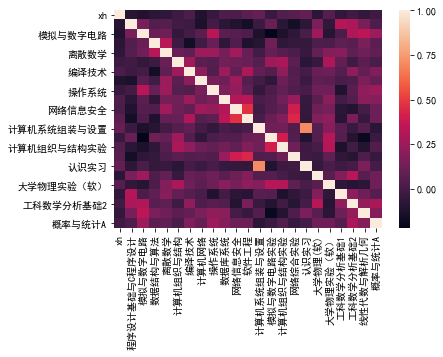

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

kch=['1120020110', '1110020011', '1090430030', '1090430050', '1090430070', '1090430060', '1110020041', '1090461030', '1090461010', '1090461020', '1090464010', '1090430100', '1120020140', '1090430090', '1090430120', '1090430110', '1090430130', '1120020042', '1090461040', '1090440010', '1120020032', '1090430012']


df=pd.read_csv("softwaregrade1.csv",sep = ",", encoding = 'utf8')
df = df[['xh','kch','kccj']]

df=df.loc[df['kch'].isin(kch)]

df=df.groupby(by=['xh','kch']).apply(lambda x: x['kccj']).unstack('kch')
df=df.groupby(by=['xh']).sum()
df.to_csv('softwarexhcj.csv',encoding='utf-8')

df=pd.read_csv("softwarexhcj.csv",sep = ",", encoding = 'utf8')
df1=pd.read_csv("kecheng.csv", encoding = 'utf8')

df1=df1.set_index('kch').to_dict()['kcmc']
df=df.rename(columns=df1)
# print(df1)
corr=df.corr()
corr.to_csv('softwarecorr.csv',encoding='utf-8',)
# print(corr)

matplotlib.rcParams['font.family'] = 'SimHei' #配置中文字体
matplotlib.rcParams['font.size'] =  10   # 更改默认字体大小
sns.heatmap(corr)
plt.show()
